
# 🧠 MNIST Digit Classification with Neural Networks

This project applies a neural network model to classify handwritten digits using the MNIST dataset. 
It demonstrates foundational deep learning techniques using **TensorFlow/Keras** and includes model training, evaluation, and visualisation.

## Objectives:
- Load and preprocess the MNIST dataset
- Train a neural network classifier
- Evaluate model performance using confusion matrix and classification report
- Visualise predictions

---


# Importing Necessary Libraries

## 📦 Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

# Load the Dataset

In [2]:
# The class names for the mnist dataset.
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

## 📥 Loading MNIST Dataset

In [3]:
# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

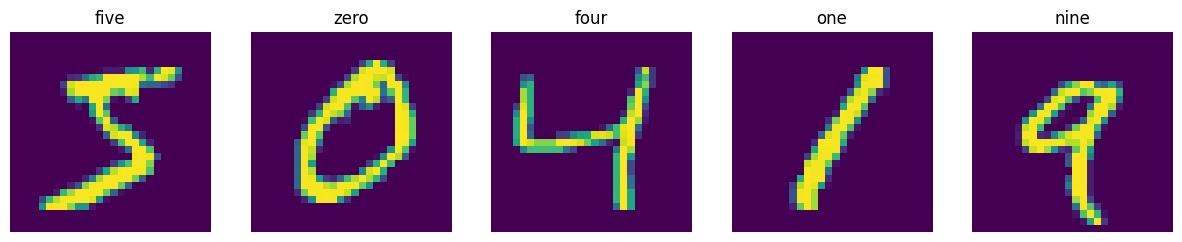

In [4]:
# Plot the first five images in the training set.  
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
 axs[i].imshow(x_train[i])
 axs[i].set_title(class_names[y_train[i]])
 axs[i].axis('off')
plt.show()

# Data Preprocessing

In [5]:
# Reshape the Data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Get the CNN first layer input shape
input_shape = x_train[0].shape

# Convert the data to type float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize pixel values to range from 0 to 1
# Dividing all pixel values by 255 brings the pixel values to range between 0 and 1 
x_train /= 255
x_test /= 255

# Number of image classes
num_classes = 10

In [6]:
# The ImageDataGenerator is used for data augmentation
# Define ddata augmentation parameters for training set

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
 rotation_range=10, # Randomly rotate images up to 10 degrees
 width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
 height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
 horizontal_flip=True, # Randomly flip images horizontally
 vertical_flip=False, # Don't randomly flip images vertically
 shear_range=0.10, # crops part of the image
 zoom_range=0.10, # #zooms the image by 10% 
)

In [7]:
# Fit the transformation to the normalised images from the training dataset 
train_datagen.fit(x_train)

## 🖼️ Visualising Predictions

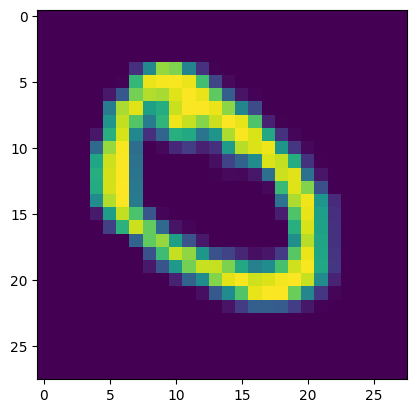

In [8]:
# Show a sample of a randomly transformed image 
plt.imshow(train_datagen.random_transform(x_train[1]))
plt.show()

# Model Building (Constructor Stage)

## 🏗️ Building the Neural Network Model

In [9]:
# Define the CNN architecture

# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters with kernels of size 3
# input_shape= input_shate. We have defined the input shape already, it is the input data and has dimensions 28x28x1
 # The first dimension of the tensor (28) is the height of the image.
 #The second dimension of the tensor (28) is the width of the image.
 #The third dimension of the tensor (1) is the number of channels in the image. In this case, 1 because the images are grayscales

# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the pool size
 # It reduces the spatial size of the feature maps and prevents overfitting
 # The output of the convolutional and pooling layers is a 3D tensor;

# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array
 # The output of the convolutional and pooling layers is a 3D tensor;
 # 1D array is required by the fully connected (dense) layers; 
 # Flatten() later enables the transition from the convolutional and pooling layers


model = Sequential()


model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='Conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_1'))

model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', name='Conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_2'))

model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', name='Conv_3'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool_3'))

model.add(Flatten(name="Flatten"))
model.add(Dense(256, activation = 'relu', name = "Fully_connected"))
model.add(Dense(num_classes, activation='softmax', name="Dense_output"))

C:\Users\natha\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool_1 (MaxPooling2D)                │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_2 (Conv2D)                      │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool_2 (MaxPooling2D)                │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_3 (Conv2D)                      │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool_3 (MaxPooling2D)                │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Fully_connected (Dense)              │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_output (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,266 (501.04 KB)

 Trainable params: 128,266 (501.04 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation

In [11]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent

# learning_rate=0.0001 specifies the step size of the updates to the weights during training
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the descend. 
# Higher values of momentum allow the optimizer to move more smoothly towards the global minima
 # and reduce the chance of getting stuck in local minima.

# Compile the CNN model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training and Evaluation (Training Stage)

## 🚀 Training the Model

In [12]:
# Train the model with 15 epochs and a batch size of 32
# to_categorical () converts integer class labels into one-hot encoded vectors;
# also used to convert predicted scores back into class labels for evaluation in the classification report
# batch_size=32: the training dataset is put into mini-batches of size 32.
#epochs=15: The model will be trained for 15 epochs or iterations; 
#This means the dataset will be passed through the model 20 times for training.

 
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32), epochs=15, 
                  validation_data=(x_test, keras.utils.to_categorical(y_test)))


Epoch 1/15


C:\Users\natha\python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.1615 - loss: 2.3021 - val_accuracy: 0.2224 - val_loss: 2.2909
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.2265 - loss: 2.2908 - val_accuracy: 0.3421 - val_loss: 2.2727
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.3062 - loss: 2.2746 - val_accuracy: 0.3998 - val_loss: 2.2338
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.3353 - loss: 2.2348 - val_accuracy: 0.4329 - val_loss: 2.1021
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.3676 - loss: 2.0817 - val_accuracy: 0.5616 - val_loss: 1.5927
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.4874 - loss: 1.6385 - val_accuracy: 0.7033 - val_loss: 1.0361
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.5874 - loss: 1.2594 - val_accuracy: 0.7572 - val_loss: 0.8078
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.6584 - loss: 1.03

## 📊 Model Evaluation

In [13]:
# Evalutate the CNN on test data
test_eval = model.evaluate(x_test, keras.utils.to_categorical(y_test), verbose = 1)

# Print result
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8527 - loss: 0.4294
Test loss: 0.3852959871292114
Test accuracy: 0.875


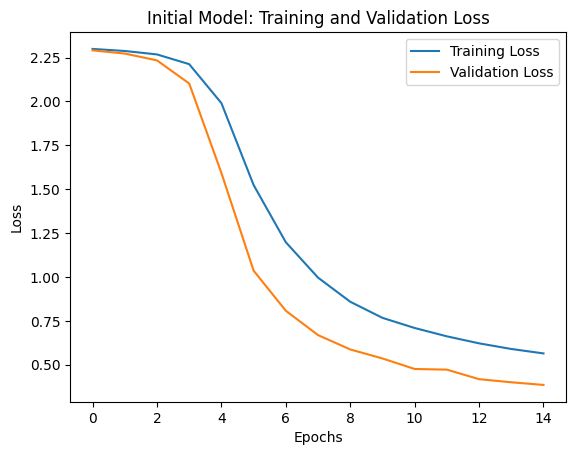

In [19]:
## checking for overfitting

# plot the training loss against validation loss

# plot the training loss as a line with label "Training Loss"
plt.plot(history.history['loss'], label='Training Loss')

# plot the validation loss as a line with label "Validation Loss"
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set the title of the plot
plt.title('Initial Model: Training and Validation Loss')

# Set the label for the x-axis
plt.xlabel('Epochs')

# Set the label for the y-axis
plt.ylabel('Loss')

# Shows the legend of the plots i.e., the labels of the two lines
plt.legend()

# Save the plot on my computer
plt.savefig('initial model losses.png')

# Shows the plot on the screen
plt.show()

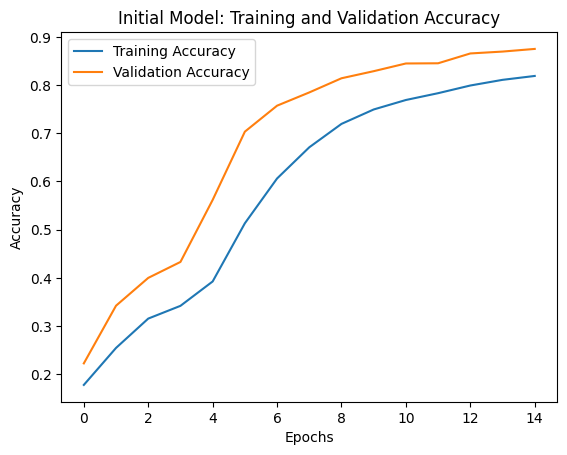

In [20]:
# plot the training loss against validation accuracy

# plot the training accuracy as a line with label "Training Accuracy"
plt.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot 
plt.title('Initial Model: Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

# Save the plot on my computer
plt.savefig('initial model accuracies.png')

#Shows the plot on the screen.
plt.show()

# Testing the Model (Make Predictions)

In [16]:
# Predict the classes of the test set
#np.argmax(model.predict(x_test), axis=-1), 
#this means that the argmax operation will be applied to the output predictions of the model
#this is the class probabilities for each test instance.
# argmax returns the class with the largest predicted probability.
 
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


# Visualise the Results

## 📊 Model Evaluation

In [17]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       980
           1       0.96      0.99      0.97      1135
           2       0.85      0.81      0.83      1032
           3       0.82      0.83      0.82      1010
           4       0.90      0.96      0.93       982
           5       0.78      0.78      0.78       892
           6       0.89      0.93      0.91       958
           7       0.82      0.85      0.84      1028
           8       0.92      0.77      0.84       974
           9       0.90      0.84      0.87      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.87     10000



<Figure size 2000x3000 with 0 Axes>

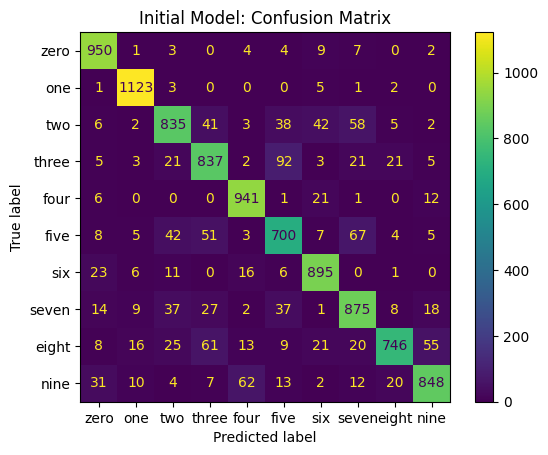

In [21]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
display_labels=class_names)
plt.title('Initial Model: Confusion Matrix')
plt.savefig('initial confusion matrix.png')
plt.show()

# Improved Model Architecture

## 🏗️ Building the Neural Network Model

In [9]:
model_1 = Sequential()


model_1.add(Conv2D(filters = 32, kernel_size=(3, 3), strides = (1, 1), padding = "same", activation='relu', input_shape=input_shape, name='Conv_1'))
model_1.add(BatchNormalization(momentum = 0.9))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding = "same", name='Pool_1'))

model_1.add(Conv2D(filters = 64, kernel_size=(3, 3), strides = (1, 1), padding = "same", activation='relu', name='Conv_2'))
model_1.add(BatchNormalization(momentum = 0.9))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding = "same", name='Pool_2'))

model_1.add(Conv2D(filters = 128, kernel_size=(3, 3), strides = (1, 1), padding = "same", activation='relu', name='Conv_3'))
model_1.add(BatchNormalization(momentum = 0.9))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding = "same", name='Pool_3'))

model_1.add(Flatten(name="Flatten"))
model_1.add(Dense(128, activation = 'relu', name = "Fully_connected"))
model_1.add(Dropout(0.2, name = 'Dropout_1'))
model_1.add(Dense(num_classes, activation='softmax', name="Dense_output"))

C:\Users\natha\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
# Print the model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool_1 (MaxPooling2D)                │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_2 (Conv2D)                      │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool_2 (MaxPooling2D)                │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_3 (Conv2D)                      │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool_3 (MaxPooling2D)                │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Fully_connected (Dense)              │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_output (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,130 (1.36 MB)

 Trainable params: 356,682 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

# Improved Model Compilation

In [11]:
# Compile the CNN model
model_1.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Training and Evaluation

In [12]:
# Train the model with batch size of 64 and 20 epochs 
history=model_1.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=64), epochs=20, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20


C:\Users\natha\python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7126 - loss: 0.8885 - val_accuracy: 0.9591 - val_loss: 0.1319
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9321 - loss: 0.2190 - val_accuracy: 0.9697 - val_loss: 0.0950
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9475 - loss: 0.1672 - val_accuracy: 0.9788 - val_loss: 0.0685
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.9592 - loss: 0.1338 - val_accuracy: 0.9787 - val_loss: 0.0635
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.9644 - loss: 0.1177 - val_accuracy: 0.9827 - val_loss: 0.0541
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.9669 - loss: 0.1044 - val_accuracy: 0.9794 - val_loss: 0.0643
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9693 - loss: 0.0991 - val_accuracy: 0.9810 - val_loss: 0.0544
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.9722 - loss: 0.0889 - val_accurac

In [13]:
# Evalutate the CNN on test data
test_eval = model_1.evaluate(x_test, keras.utils.to_categorical(y_test), verbose = 1)

# Print result
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9801 - loss: 0.0599
Test loss: 0.04405701160430908
Test accuracy: 0.9860000014305115


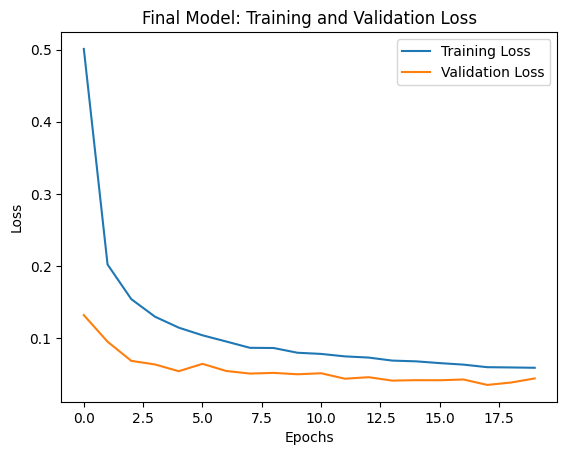

In [21]:
## checking for overfitting

# plot the training loss against validation loss

# plot the training loss as a line with label "Training Loss"
plt.plot(history.history['loss'], label='Training Loss')

# plot the validation loss as a line with label "Validation Loss"
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set the title of the plot
plt.title('Final Model: Training and Validation Loss')

# Set the label for the x-axis
plt.xlabel('Epochs')

# Set the label for the y-axis
plt.ylabel('Loss')

# Shows the legend of the plots i.e., the labels of the two lines
plt.legend()

# Save the plot on my computer
plt.savefig('improved model losses.png')

# Shows the plot on the screen
plt.show()

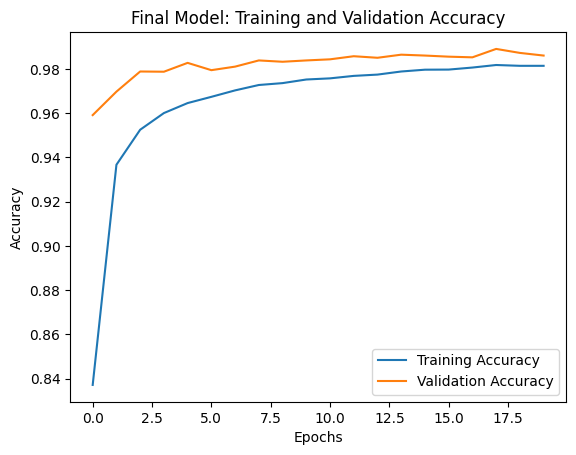

In [20]:
# plot the training loss against validation accuracy

# plot the training accuracy as a line with label "Training Accuracy"
plt.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot 
plt.title('Final Model: Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

# Save the plot on my computer
plt.savefig('improved model accuracies.png')

#Shows the plot on the screen.
plt.show()

# Model Testing (Predictions)

In [16]:
# Make prediction
y_pred = np.argmax(model_1.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


# Visualise the Improved Result

## 📊 Model Evaluation

In [25]:
# Print the classification report
print(classification_report(y_test, y_pred, target_names = class_names))

              precision    recall  f1-score   support

        zero       1.00      0.99      0.99       980
         one       1.00      0.99      0.99      1135
         two       0.97      0.97      0.97      1032
       three       0.99      1.00      0.99      1010
        four       0.98      1.00      0.99       982
        five       0.96      0.99      0.98       892
         six       0.99      0.97      0.98       958
       seven       0.99      0.99      0.99      1028
       eight       0.99      0.99      0.99       974
        nine       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

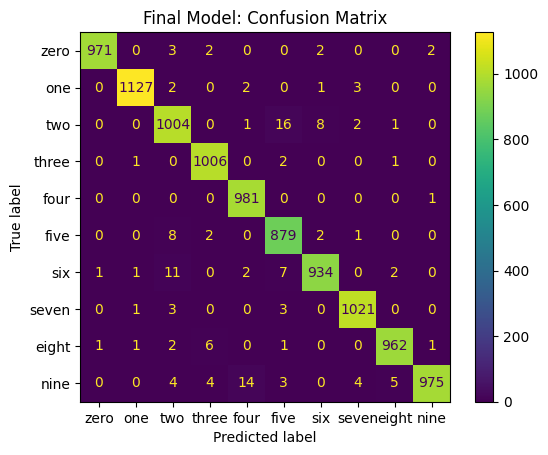

In [19]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
display_labels=class_names)
plt.title('Final Model: Confusion Matrix')
plt.savefig('improved confusion matrix.png')
plt.show()